In [16]:
%matplotlib inline

### os
import os
import sys

### datetimes
from datetime import datetime, timedelta

### scipy
import numpy as np
import pandas as pd
import xarray as xr
import geopandas as gpd
import cartopy.crs as ccrs
import dask
from dask.diagnostics import ProgressBar
from tqdm import tqdm

### plotting
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns


In [17]:
import pathlib

HOME = pathlib.Path.home()
CWD = pathlib.Path.cwd()

### import the local package 

In [18]:
sys.path.append('../../')

In [19]:
import seaborn as sns

In [20]:
from ICU_Water_Watch import C3S, geo, plot, utils, verification, domains

In [21]:
from datetime import datetime, timedelta
from calendar import month_abbr

In [22]:
domain_name = 'Tropical_Pacific'

In [23]:
domain = domains.domains[domain_name]

In [24]:
monthly_ACC = pd.read_csv('./outputs_paper/ACC_df_Tropical_Pacific_monthly.csv', index_col=0)

In [25]:
monthly_ACC

,ECMWF,UKMO,METEO_FRANCE,DWD,CMCC,NCEP,JMA,MME
lead,,,,,,,,
1,0.520783,0.481243,0.447290,0.402206,0.490681,0.375684,0.460934,0.533076
2,0.467500,0.440182,0.406089,0.371724,0.449293,0.322211,0.420557,0.491730
3,0.431593,0.415728,0.366529,0.349761,0.405959,0.296802,0.387277,0.460999
4,0.401098,0.388554,0.340149,0.323924,0.369537,0.281616,0.361275,0.434859
5,0.389990,0.368912,0.324991,0.298712,0.343651,0.274010,0.328216,0.416471


In [26]:
seasonal_ACC = pd.read_csv('./outputs_paper/ACC_df_Tropical_Pacific_seasonal.csv', index_col=0)

In [27]:
seasonal_ACC

,ECMWF,UKMO,METEO_FRANCE,DWD,CMCC,NCEP,JMA,MME
lead,,,,,,,,
3,0.643259,0.623040,0.571524,0.550474,0.622683,0.484911,0.595826,0.669469
4,0.594415,0.580271,0.526194,0.503448,0.572206,0.437253,0.548355,0.627107
5,0.559835,0.551491,0.490757,0.466882,0.525935,0.411246,0.509871,0.594955


In [28]:
GCMs = ['ECMWF', 'UKMO', 'METEO_FRANCE', 'DWD', 'CMCC', 'NCEP', 'JMA']

In [32]:
use_verif = 'ERA5'

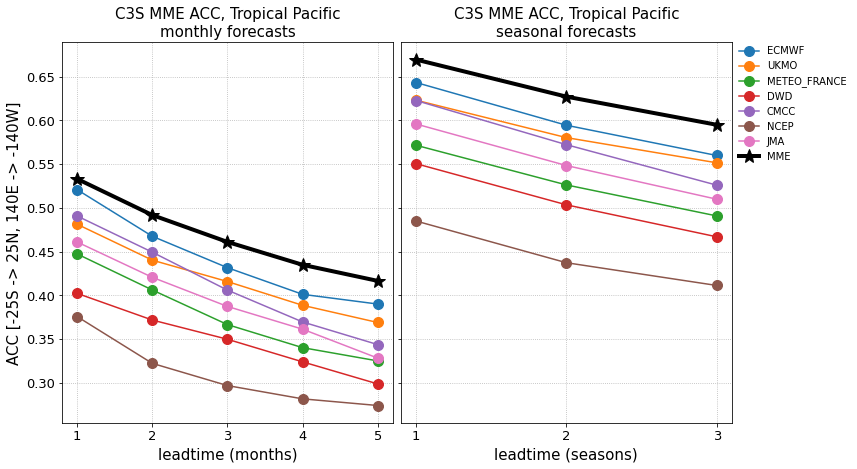

In [67]:
f, axes = plt.subplots(ncols=2, figsize=(12, 7), sharey=True)


plt.subplots_adjust(wspace=0.025)

ax = axes[0]

monthly_ACC.loc[:,GCMs].plot(marker='o', markersize=10, ax=ax)

monthly_ACC.loc[:,'MME'].plot(marker='*', markersize=15, ax=ax, color='k', label='MME', lw=4, legend=None)

ax.legend('', frameon=False)

ax.grid(ls=':')

ax.set_xticks(monthly_ACC.index)

[l.set_fontsize(13) for l in ax.xaxis.get_ticklabels()]
[l.set_fontsize(13) for l in ax.yaxis.get_ticklabels()]

ax.set_xlabel('leadtime (months)', fontsize=15);

ax.set_ylabel(f"ACC [{domain[2]}S -> {domain[3]}N, {domain[0]}E -> {domain[1] - 360}W]", fontsize=15);

ax.set_title(f"C3S MME ACC, {domain_name.replace('_',' ')}\nmonthly forecasts", fontsize=15)

ax = axes[1]

seasonal_ACC.loc[:,GCMs].plot(marker='o', markersize=10, ax=ax)

seasonal_ACC.loc[:,'MME'].plot(marker='*', markersize=15, ax=ax, color='k', label='MME', lw=4)

ax.legend('')

plt.legend(loc=(1.01, 0.675), frameon=False);

ax.grid(ls=':')

ax.set_xticks(seasonal_ACC.index)

ax.set_xticklabels(seasonal_ACC.index - 2)

[l.set_fontsize(13) for l in ax.xaxis.get_ticklabels()]
[l.set_fontsize(13) for l in ax.yaxis.get_ticklabels()]

ax.set_xlabel('leadtime (seasons)', fontsize=15);

ax.set_title(f"C3S MME ACC, {domain_name.replace('_',' ')}\nseasonal forecasts", fontsize=15)

f.savefig(f'./figures_paper/monthly_and_seasonal_ACC_{domain_name}.png', dpi=200, bbox_inches='tight', facecolor='w') 

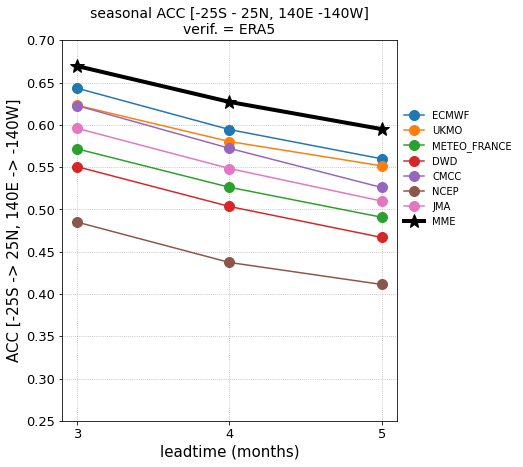

In [33]:
f, ax = plt.subplots(figsize=(6,7))
seasonal_ACC.loc[:,GCMs].plot(marker='o', markersize=10, ax=ax)
# ACC_df.loc[:,'Best_5'].plot(marker='s', markersize=10, ax=ax, color='0.4', label='Best 5', lw=4)
seasonal_ACC.loc[:,'MME'].plot(marker='*', markersize=15, ax=ax, color='k', label='MME', lw=4)
ax.legend()
ax.set_xlabel('leadtime (months)', fontsize=15);
ax.set_ylabel(f"ACC [{domain[2]}S -> {domain[3]}N, {domain[0]}E -> {domain[1] - 360}W]", fontsize=15);
ax.set_xticks(seasonal_ACC.index)
ax.grid(ls=':')
ax.set_title(f"{period} ACC [{domain[2]}S - {domain[3]}N, {domain[0]}E {domain[1] - 360}W]\nverif. = {use_verif.upper()}", fontsize=14, loc='center') 
[l.set_fontsize(13) for l in ax.xaxis.get_ticklabels()]
[l.set_fontsize(13) for l in ax.yaxis.get_ticklabels()]

ax.set_ylim(0.25, 0.70)

plt.legend(loc=(1.01, 0.5), frameon=False); 